In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE 572 Data Mining/AB_NYC_2019.csv')

In [4]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# EDA

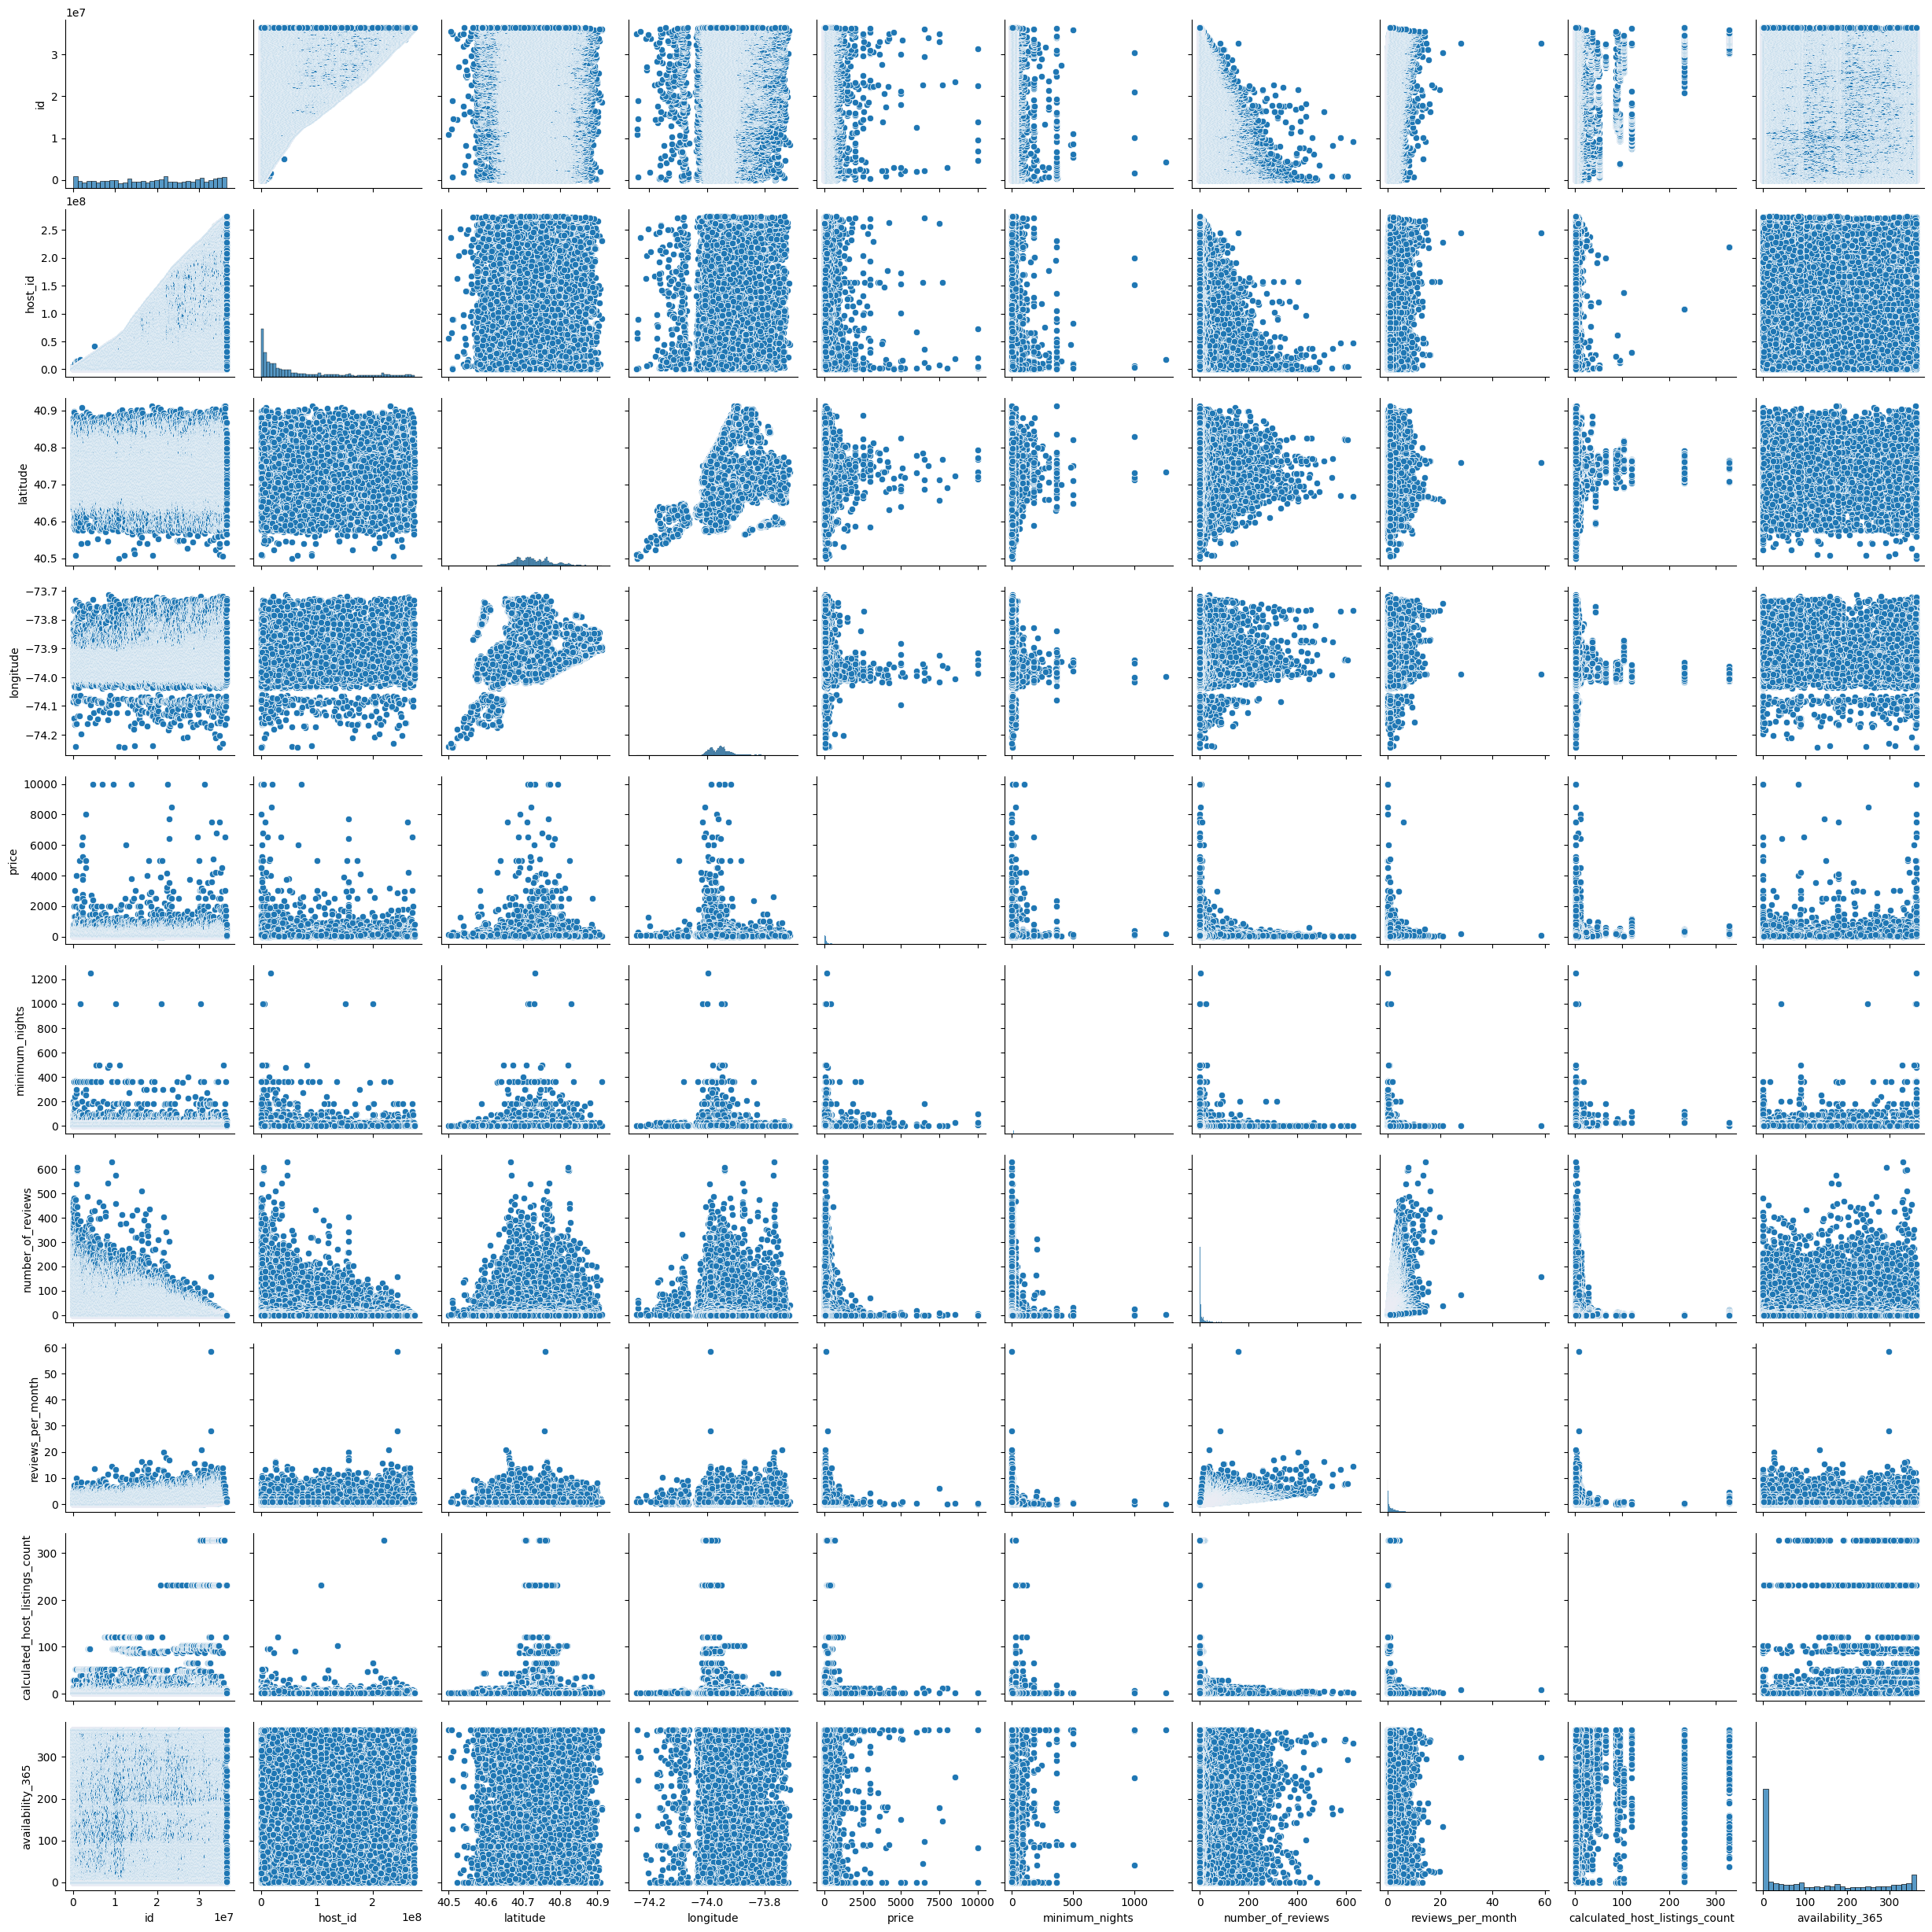

In [8]:
# Takes a lot of time
# Avoid rerunning
sns.pairplot(df)

In [9]:
# Numerical columns List
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# Categorical columns List
cat_cols = df.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [10]:
# Numerical columns only
df_num = df.drop(cat_cols, axis=1)
# Categorical Columns only
df_cat = df.drop(num_cols, axis=1)

In [11]:
df['price_log'] = np.log(df.price+1)

<Axes: >

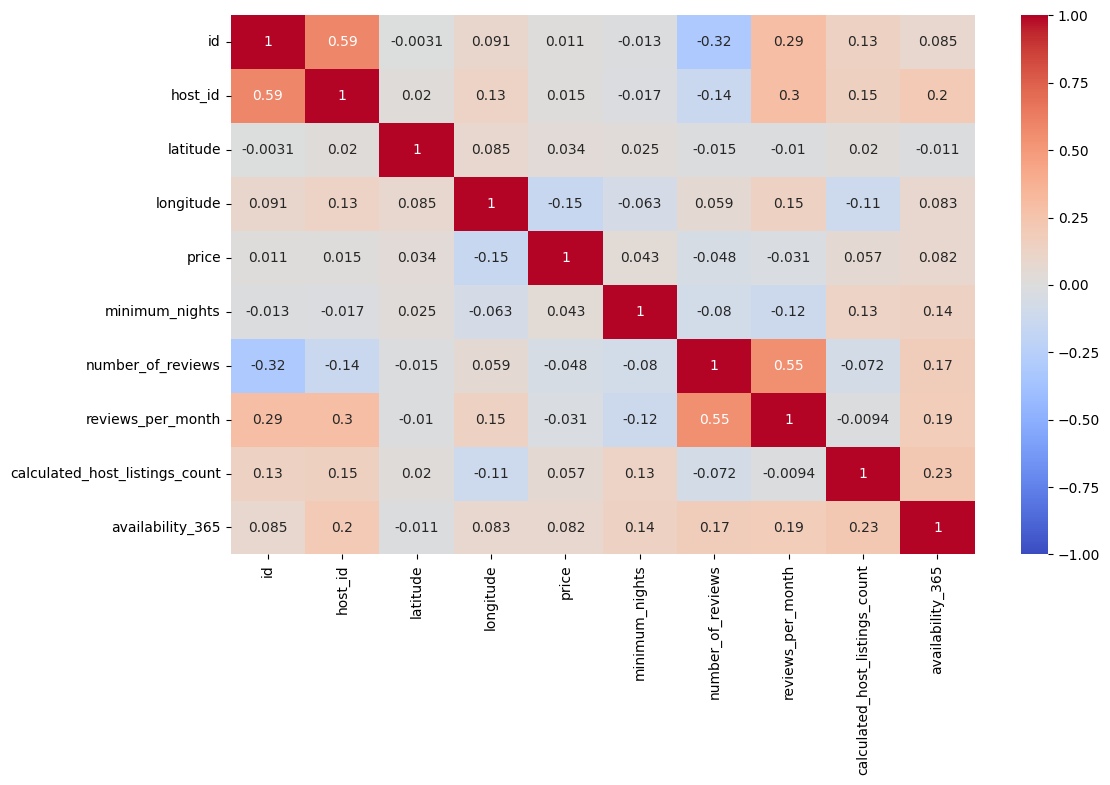

In [12]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_num.corr(), annot = True, vmin = -1, vmax = 1, cmap='coolwarm')

<ipython-input-13-6bc46d51438d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette ='hls')


(0.0, 1000.0)

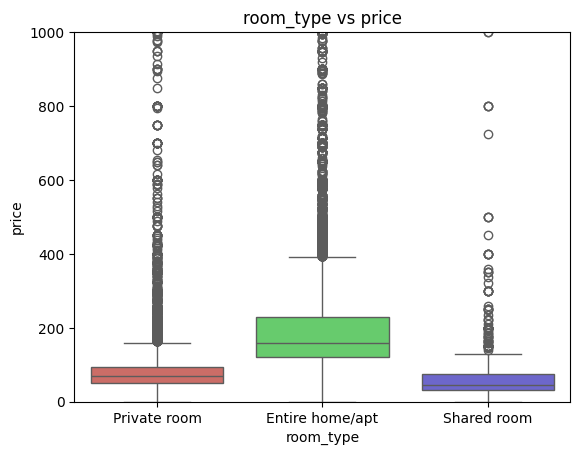

In [13]:
sns.boxplot(data=df, x='room_type', y='price', palette ='hls')
plt.title('room_type vs price')
plt.ylim(0,1000)

<ipython-input-14-b8fe66aa47e6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='price', palette ='hls')


Text(0.5, 1.0, 'Price vs Neighbourhood Group')

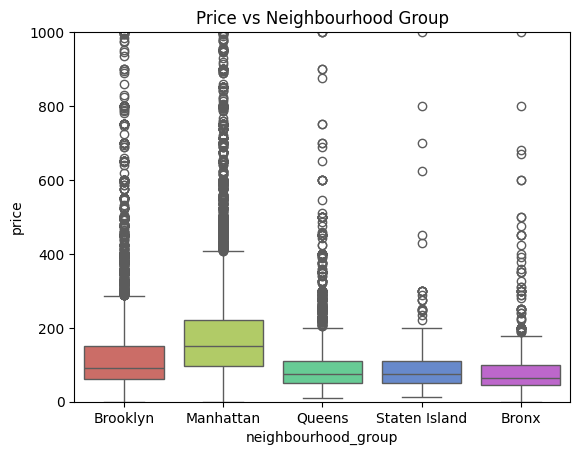

In [14]:
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette ='hls')
plt.ylim(0,1000)
plt.title('Price vs Neighbourhood Group')

Text(0.5, 1.0, 'Price vs Number of Reviews')

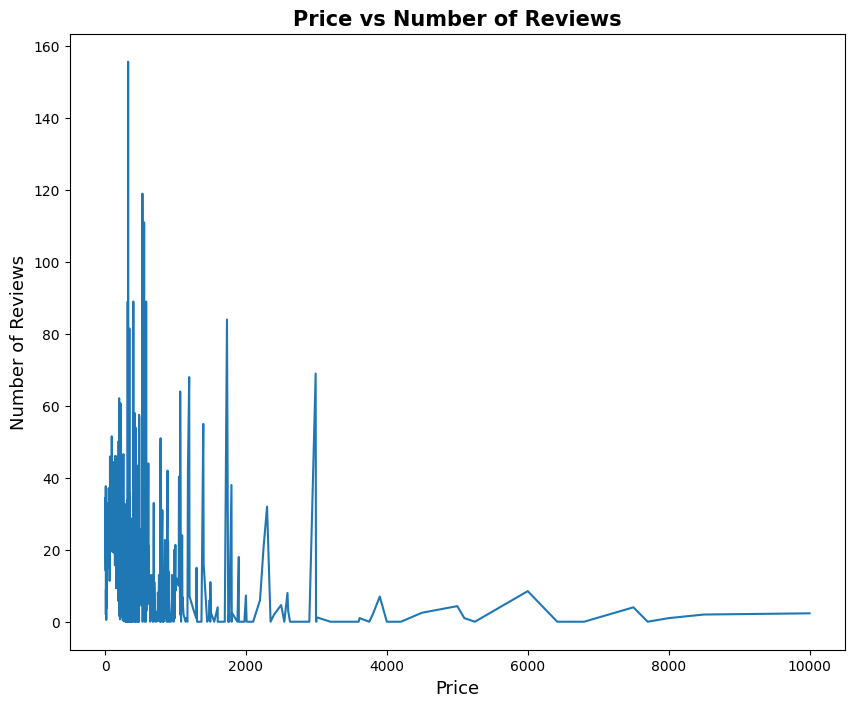

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='price', y='number_of_reviews', errorbar=None )

plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews",size=15, weight='bold')

Text(0.5, 1.0, 'Log-Price Distribution Plot')

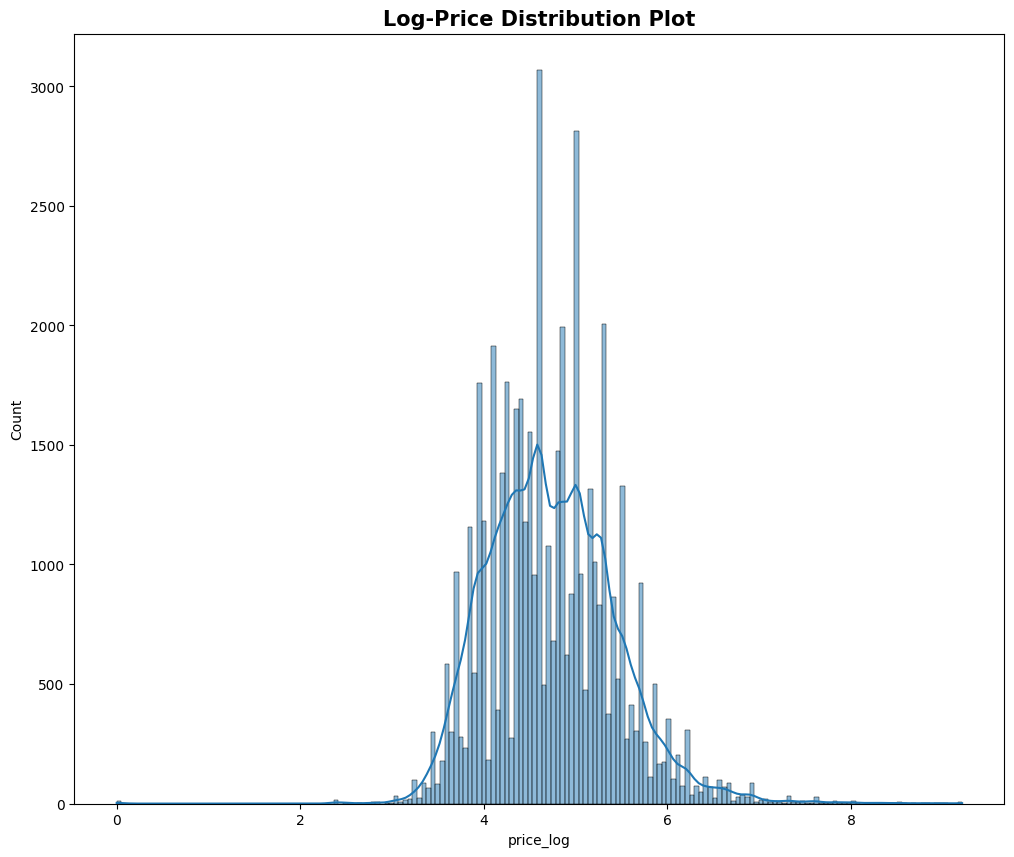

In [16]:
plt.figure(figsize=(12,10))
sns.histplot(df['price_log'], kde="True")
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

Text(0.5, 1.0, 'Neighbourhood Group vs Price')

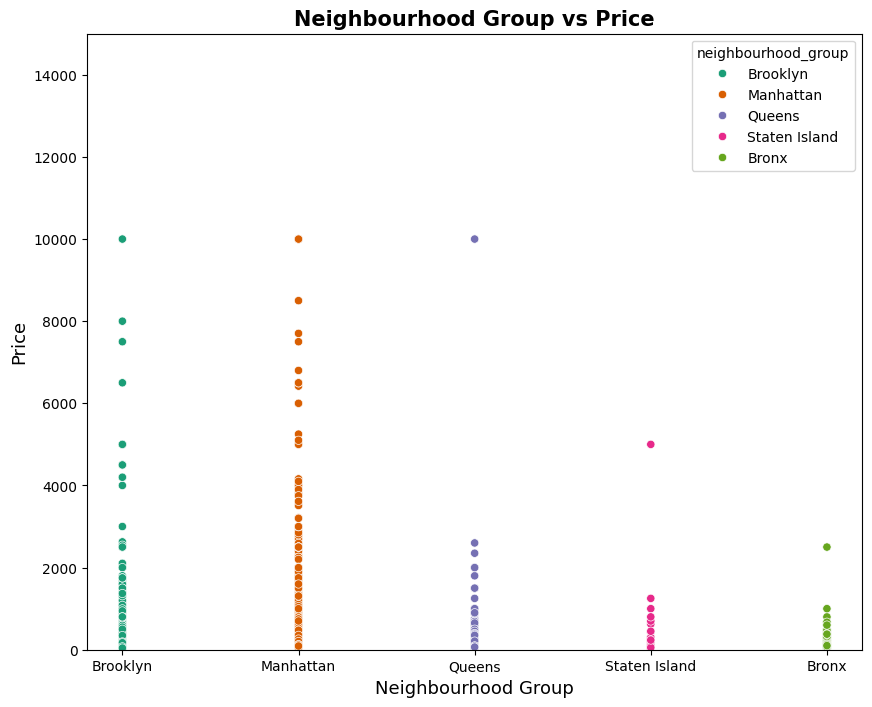

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette="Dark2")

plt.xlabel("Neighbourhood Group", size=13)
plt.ylabel("Price", size=13)
plt.ylim(0,15000)
plt.title("Neighbourhood Group vs Price",size=15, weight='bold')

<ipython-input-18-be08418acaaa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='room_type', y='number_of_reviews', palette ='hls')


<Axes: xlabel='room_type', ylabel='number_of_reviews'>

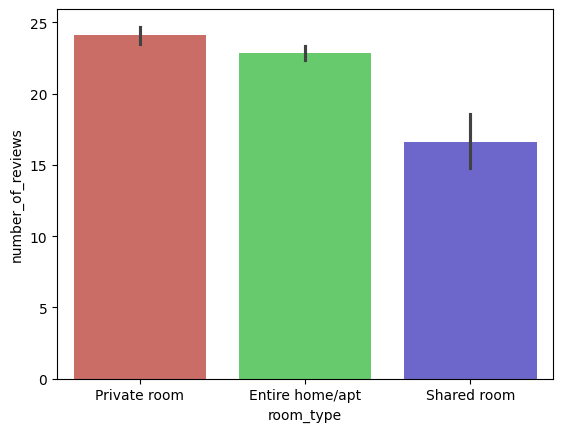

In [18]:
sns.barplot(data=df, x='room_type', y='number_of_reviews', palette ='hls')

<ipython-input-19-01fe2e9d3ad9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='number_of_reviews', palette ='hls')


<Axes: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

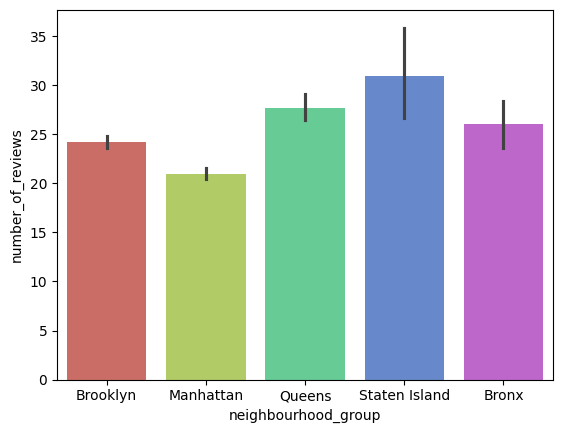

In [19]:
sns.barplot(data=df, x='neighbourhood_group', y='number_of_reviews', palette ='hls')

Text(0.5, 1.0, 'Room Type vs Price')

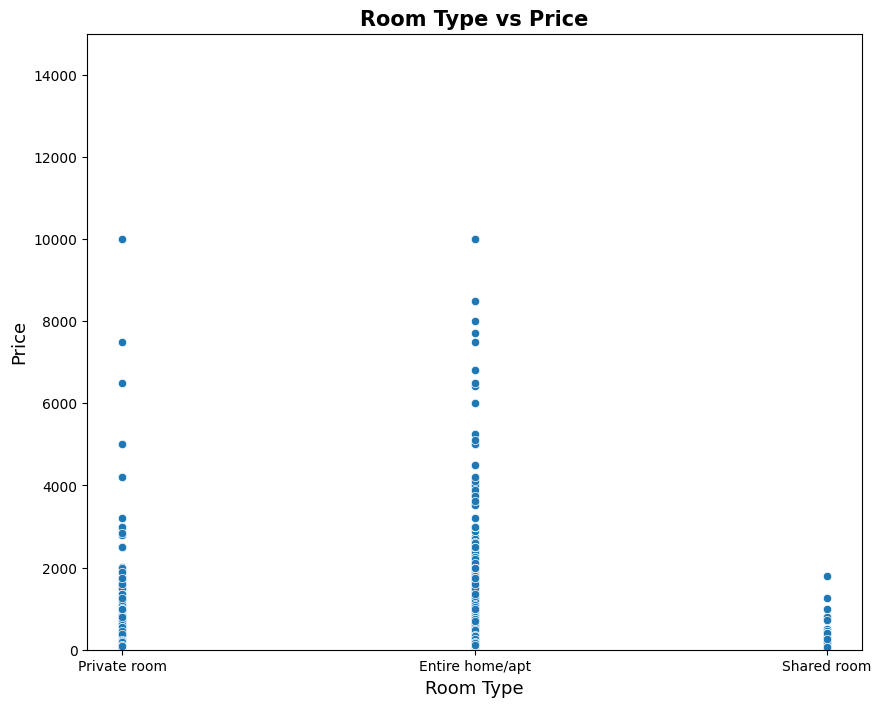

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='room_type', y='price', data= df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.ylim(0,15000)
plt.title("Room Type vs Price",size=15, weight='bold')

# Pre-processing

In [21]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [22]:
model = df.drop(columns=['name','id' ,'host_id','host_name','last_review','price'])
model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [23]:
mean = model['reviews_per_month'].mean()
mean

1.3732214298586618

In [24]:
model['reviews_per_month'].fillna(mean, inplace=True)
model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [25]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  price_log                       48895 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.1+ MB


In [26]:
original_categories = model['neighbourhood_group'].astype("category").cat.categories

# Print the mapping between original values and codes
print("Neighbourhood Group Encoding")
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Neighbourhood Group Encoding
Original Value: Bronx | Code: 0
Original Value: Brooklyn | Code: 1
Original Value: Manhattan | Code: 2
Original Value: Queens | Code: 3
Original Value: Staten Island | Code: 4


In [27]:
original_categories = model['neighbourhood'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

print("\nRoom Type Encoding")
original_categories = model['room_type'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

Original Value: Allerton | Code: 0
Original Value: Arden Heights | Code: 1
Original Value: Arrochar | Code: 2
Original Value: Arverne | Code: 3
Original Value: Astoria | Code: 4
Original Value: Bath Beach | Code: 5
Original Value: Battery Park City | Code: 6
Original Value: Bay Ridge | Code: 7
Original Value: Bay Terrace | Code: 8
Original Value: Bay Terrace, Staten Island | Code: 9
Original Value: Baychester | Code: 10
Original Value: Bayside | Code: 11
Original Value: Bayswater | Code: 12
Original Value: Bedford-Stuyvesant | Code: 13
Original Value: Belle Harbor | Code: 14
Original Value: Bellerose | Code: 15
Original Value: Belmont | Code: 16
Original Value: Bensonhurst | Code: 17
Original Value: Bergen Beach | Code: 18
Original Value: Boerum Hill | Code: 19
Original Value: Borough Park | Code: 20
Original Value: Breezy Point | Code: 21
Original Value: Briarwood | Code: 22
Original Value: Brighton Beach | Code: 23
Original Value: Bronxdale | Code: 24
Original Value: Brooklyn Heights

In [28]:
model['neighbourhood_group']= model['neighbourhood_group'].astype("category").cat.codes
model['neighbourhood'] = model['neighbourhood'].astype("category").cat.codes
model['room_type'] = model['room_type'].astype("category").cat.codes
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  price_log                       48895 non-null  float64
dtypes: float64(4), int16(1), int64(4), int8(2)
memory usage: 3.2 MB


In [29]:
# build the model: X, y
model_x, model_y = model.iloc[:,:-1], model.iloc[:,-1]

In [30]:
model_y

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price_log, Length: 48895, dtype: float64

In [31]:
model_x

neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                        1            108  40.64749  -73.97237          1   
1                        2            127  40.75362  -73.98377          0   
2                        2             94  40.80902  -73.94190          1   
3                        1             41  40.68514  -73.95976          0   
4                        2             61  40.79851  -73.94399          0   
...                    ...            ...       ...        ...        ...   
48890                    1             13  40.67853  -73.94995          1   
48891                    1             28  40.70184  -73.93317          1   
48892                    2             94  40.81475  -73.94867          0   
48893                    2             95  40.75751  -73.99112          2   
48894                    2             95  40.76404  -73.98933          1   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                   1                  9           0.210000   
1                   1                 45           0.380000   
2                   3                  0           1.373221   
3                   1                270           4.640000   
4                  10                  9           0.100000   
...               ...                ...                ...   
48890               2                  0           1.373221   
48891               4                  0           1.373221   
48892              10                  0           1.373221   
48893               1                  0           1.373221   
48894               7                  0           1.373221   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
4                                   1                 0  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[48895 rows x 10 columns]

In [32]:
#  Normalization: each feature has 0 mean and 1 standard deviation
scaler = StandardScaler()
model_x = scaler.fit_transform(model_x)

In [33]:
model_x

array([[-0.91782758,  0.01276167, -1.4938492 , ..., -0.77664098,
        -0.03471643,  1.91625031],
       [ 0.4412221 ,  0.28915589,  0.45243602, ..., -0.66313811,
        -0.15610444,  1.84027456],
       [ 0.4412221 , -0.19089723,  1.46839948, ...,  0.        ,
        -0.18645145,  1.91625031],
       ...,
       [ 0.4412221 , -0.19089723,  1.57348017, ...,  0.        ,
        -0.18645145, -0.65173008],
       [ 0.4412221 , -0.17635016,  0.52377353, ...,  0.        ,
        -0.03471643, -0.84166946],
       [ 0.4412221 , -0.17635016,  0.64352518, ...,  0.        ,
        -0.18645145, -0.68212038]])

In [34]:
# split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(model_x, model_y, test_size=0.7,random_state=42)

<Axes: >

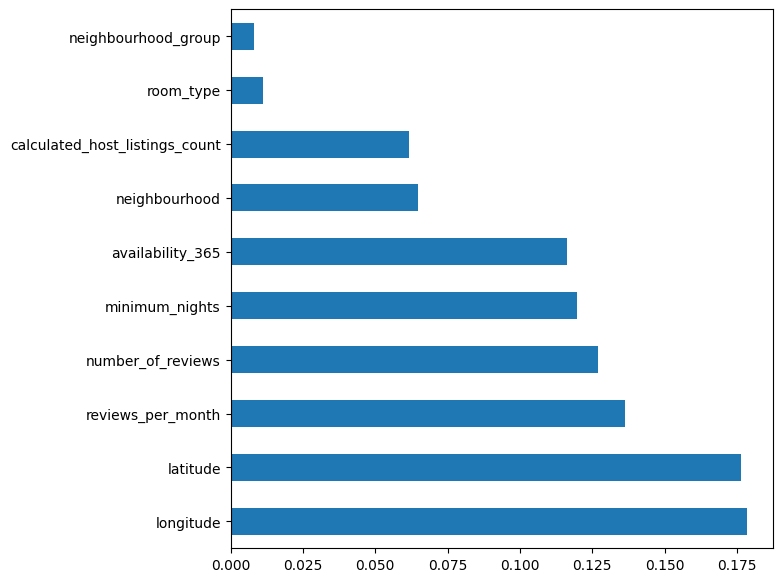

In [35]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')

In [36]:
model.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_log'],
      dtype='object')

In [37]:
# drop the features'neighbourhood_group' & 'room type'
model = model.drop(columns=['neighbourhood_group', 'room_type'])

In [38]:
model.columns

Index(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_log'],
      dtype='object')

In [39]:
# build the model: X, y
model_X, model_y = model.iloc[:,:-1], model.iloc[:,-1]

# split the training set & testing set
X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.3)

# Normalization
scaler = StandardScaler()
model_X = scaler.fit_transform(model_X)

In [40]:
X_test['number_of_reviews']

22991     5
1670      3
4459      2
47143     3
39703     1
         ..
10017     9
27966    14
44765     7
28252     3
20963    77
Name: number_of_reviews, Length: 14669, dtype: int64

# Rule Based Approach

### a. Reviews per month

In [41]:
mean = model['price_log'].mean()
mean

4.736884710386774

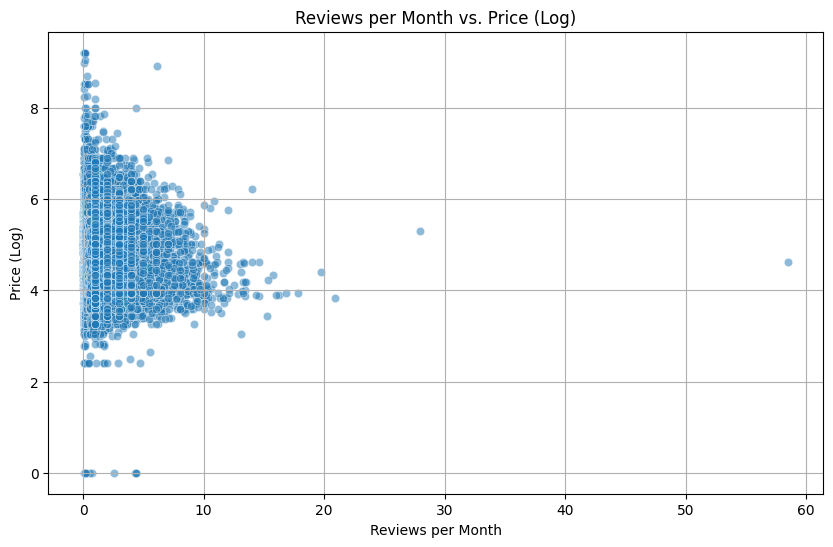

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price_log', data=df, alpha=0.5)
plt.title('Reviews per Month vs. Price (Log)')
plt.xlabel('Reviews per Month')
plt.ylabel('Price (Log)')
plt.grid(True)

In [43]:
rpm_stats = model['reviews_per_month'].describe()
rpm_stats

count    48895.000000
mean         1.373221
std          1.497775
min          0.010000
25%          0.280000
50%          1.220000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

### Observations:

#### A chunk of the data seems to be around 0 - 10 range of reviews_per_month.
#### In the 0 - 10 range, the price_log range can be either 3 - 7.
#### Looking at the standard deviation, there isn't much to distinguish. Ignoring this feature would be best.

### b. Number of Reviews

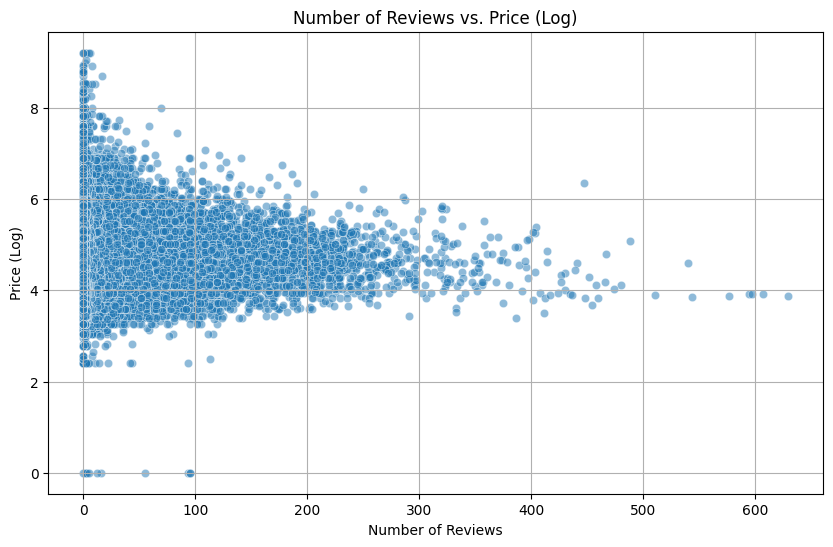

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price_log', data=df, alpha=0.5)
plt.title('Number of Reviews vs. Price (Log)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (Log)')
plt.grid(True)

In [45]:
nr_stats = model['number_of_reviews'].describe()
nr_stats

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [46]:
filtered_listings = model[model['number_of_reviews'] <= 1]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with number_of_reviews less than or equal to 1 is: {mean_price_log}")

The mean price_log for listings with number_of_reviews less than or equal to 1 is: 4.799529469943291


In [47]:
filtered_listings = model[(model['minimum_nights'] > 1) & (model['minimum_nights'] <= 5)]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with minimum_nights between 1 and 5 is: {mean_price_log}")

The mean price_log for listings with minimum_nights between 1 and 5 is: 4.796398202698335


In [48]:
filtered_listings = model[model['minimum_nights'] > 5]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with minimum_nights greater than 5 is: {mean_price_log}")

The mean price_log for listings with minimum_nights greater than 5 is: 4.746892680091304


In [49]:
def num_of_reviews_predictor(num_of_reviews, price):
    # Predicts the price given the number of reviews.

    # If number of reviews is either 0 or 1, price would increase from 4.74 to 4.80.
    if num_of_reviews <= 1:
        return price + 0.06
    # If number of reviews is between 1 and 24, price remains unchanged.
    elif 1 < num_of_reviews <=  24:
        return price
    # If number of reviews is greater than 24, price would decrease from 4.74 to 4.68
    else:
        return price - 0.06

### Observations:

#### Similar to the previous plot, in the 0 - 10 range in terms of number_of_reviews, the price_log range can either be 3 - 7.
#### Seems like if Airbnb listings that have 100+ reviews, then that means it stays between 4 - 6 range in terms of price_log.
#### From looking at the statistics, if the number of reviews is less than or equal to 1, then value seems to be around 4.80 range. If it's been 1 and 24 number of reviews, the price_log would be at around 4.72, which makes sense due to how close it is towards our base price of 4.74. If it goes past 24 number of reviews, then the price drops to 4.68

### c. minimum_nights

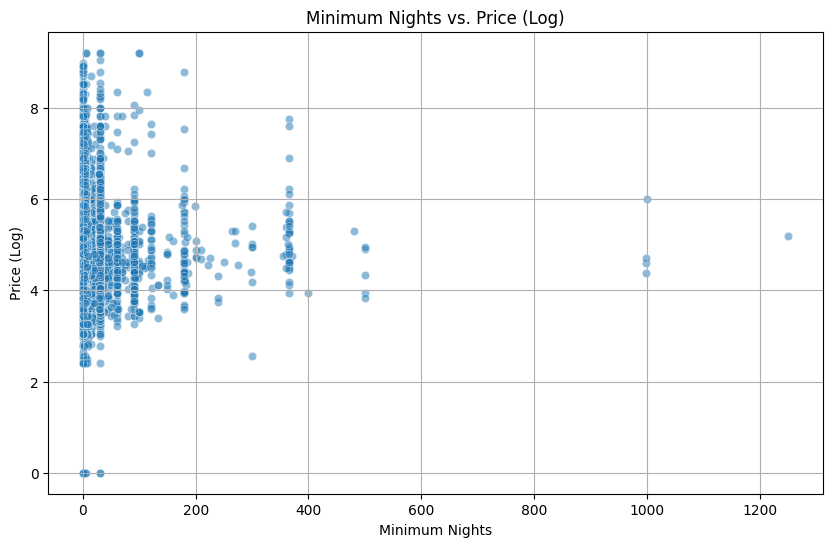

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price_log', data=df, alpha=0.5)
plt.title('Minimum Nights vs. Price (Log)')
plt.xlabel('Minimum Nights')
plt.ylabel('Price (Log)')
plt.grid(True)
plt.show()

In [51]:
mn_stats = model['minimum_nights'].describe()
mn_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [52]:
filtered_listings = model[model['minimum_nights'] <= 1]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with minimum_nights less than or equal to 1 is: {mean_price_log}")

The mean price_log for listings with minimum_nights less than or equal to 1 is: 4.607107503738379


In [53]:
filtered_listings = model[(model['minimum_nights'] > 1) & (model['minimum_nights'] <= 5)]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with minimum_nights between 1 and 5 is: {mean_price_log}")

The mean price_log for listings with minimum_nights between 1 and 5 is: 4.796398202698335


In [54]:
filtered_listings = model[model['minimum_nights'] > 5]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with minimum_nights greater than 5 is: {mean_price_log}")

The mean price_log for listings with minimum_nights greater than 5 is: 4.746892680091304


### Observations:

#### A good amount of the data seems to be around the 10 or less minimum nights area.
#### From the statistics, if the Airbnb listing states only 1 minimum night, then the value is at around 4.61, which is less than the base price. If it's between 1 and 5, it's rental price is at around 4.80. Lastly, if greater than 5, than rental price is close to base price, which is 4.75.

In [55]:
def minimum_nights_predictor(min_nights, price):
    # Predicts the price given the number of reviews.

    # If minimum nights is either 0 or 1, price would decrease from 4.74 to 4.60.
    if min_nights <= 1:
        return price - 0.14
    # If minimum nights is between 1 and 5, price increases from 4.74 to 4.80.
    elif 1 < min_nights <=  5:
        return price + 0.06
    # If minimum nights is greater than 5, price will remain the same.
    else:
        return price

### d. Availability 365

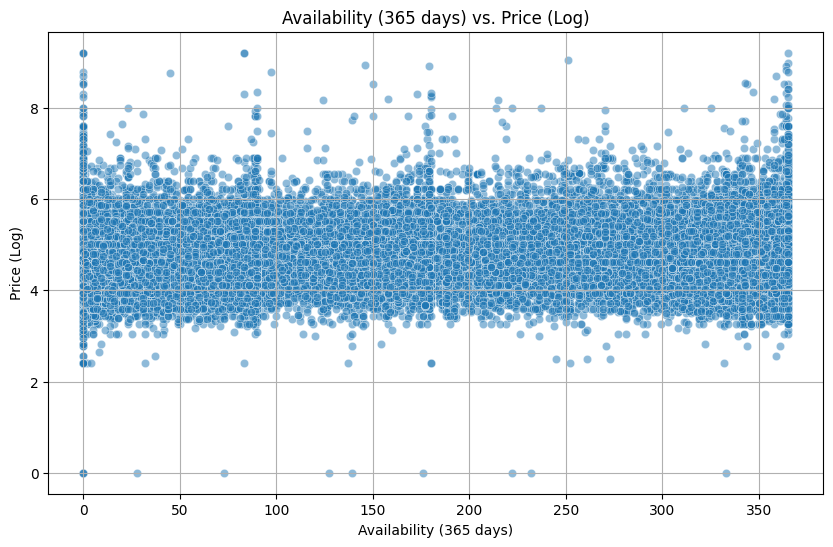

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price_log', data=df, alpha=0.5)
plt.title('Availability (365 days) vs. Price (Log)')
plt.xlabel('Availability (365 days)')
plt.ylabel('Price (Log)')
plt.grid(True)
plt.show()

In [57]:
a365_stats = model['availability_365'].describe()
a365_stats

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [58]:
filtered_listings = model[model['availability_365'] == 0]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with availability_365 equal to 0 is: {mean_price_log}")

The mean price_log for listings with availability_365 equal to 0 is: 4.662826577480787


In [59]:
filtered_listings = model[(model['availability_365'] >= 1) & (model['availability_365'] <= 227)]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with availability_365 between 1 and 227 is: {mean_price_log}")

The mean price_log for listings with availability_365 between 1 and 227 is: 4.739408531938593


In [60]:
filtered_listings = model[model['availability_365'] > 227]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with availability_365 greater than 227 is: {mean_price_log}")

The mean price_log for listings with availability_365 greater than 227 is: 4.839327334915941


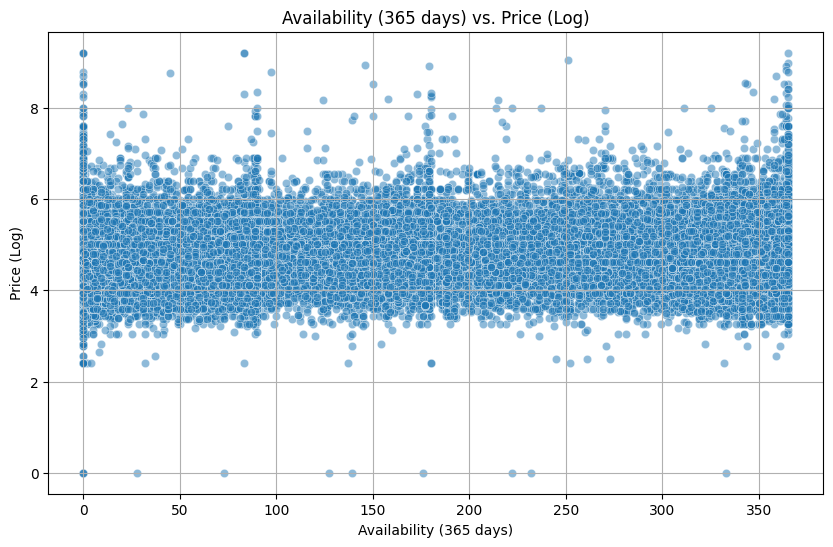

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price_log', data=df, alpha=0.5)
plt.title('Availability (365 days) vs. Price (Log)')
plt.xlabel('Availability (365 days)')
plt.ylabel('Price (Log)')
plt.grid(True)

In [62]:
a365_stats = model['availability_365'].describe()
a365_stats

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [63]:
filtered_listings = model[model['availability_365'] == 0]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with availability_365 equal to 0 is: {mean_price_log}")

The mean price_log for listings with availability_365 equal to 0 is: 4.662826577480787


In [64]:
filtered_listings = model[(model['availability_365'] >= 1) & (model['availability_365'] <= 227)]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with availability_365 between 1 and 227 is: {mean_price_log}")

The mean price_log for listings with availability_365 between 1 and 227 is: 4.739408531938593


In [65]:
filtered_listings = model[model['availability_365'] > 227]
mean_price_log = filtered_listings['price_log'].mean()

print(f"The mean price_log for listings with availability_365 greater than 227 is: {mean_price_log}")

The mean price_log for listings with availability_365 greater than 227 is: 4.839327334915941


### Observations:

#### Glancing at the plot, there's a lot of scattered data points. Most listings seem to be between the 4 and 6 range of price_log.
#### From the statistics, if an Airbnb has 0 availability, then price_log is at 4.66. This makes sense because cheaper prices tend to be ideal for budget-minded people and likely that the listing will be taken. If it ranges from 1 to 227 days, the base price seems to be at 4.73. Finally, if availability for the Airbnb is greater than 227 days, then the base price would be at 4.84. That also makes sense because no one one want rent listings that cost too much. If a listing has a high price, it most likely not taken for consideration when finding a place to stay at. In result, it will be avail to majority of the year

In [66]:
def avail_predictor(avail_365, price):
    # Predicts the price given the number of reviews.

    # If availability is 0, price would decrease from 4.74 to 4.66.
    if avail_365 == 0:
        return price - 0.08
    # If availability is between 1 and 227, price remains the same.
    elif 1 <= avail_365 <=  227:
        return price
    # If availability is greater than 227, price will increase from 4.74 to 4.84.
    else:
        return price + 0.10

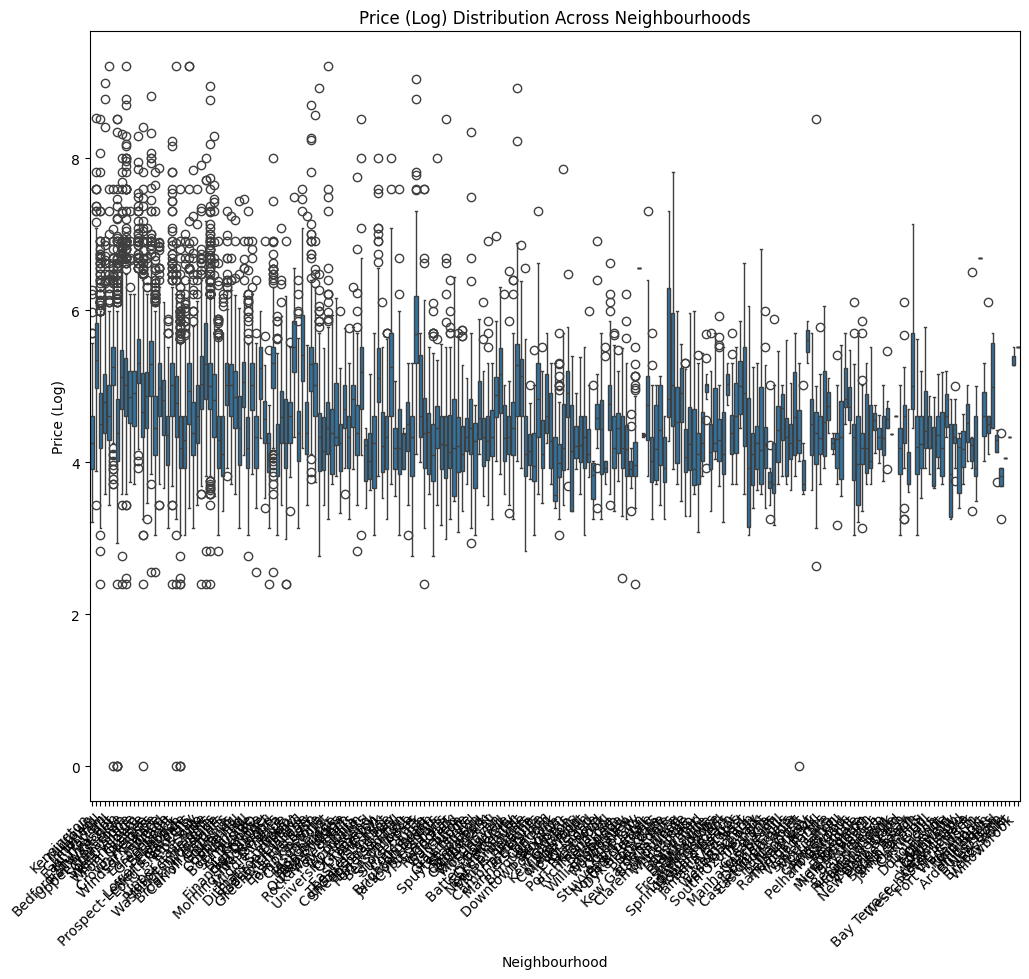

In [67]:
plt.figure(figsize=(12,10))
sns.boxplot(x='neighbourhood', y='price_log', data=df)
plt.title('Price (Log) Distribution Across Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (Log)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [68]:
model_stats = model.describe()
model_stats

neighbourhood      latitude     longitude  minimum_nights  \
count   48895.000000  48895.000000  48895.000000    48895.000000   
mean      107.122732     40.728949    -73.952170        7.029962   
std        68.743096      0.054530      0.046157       20.510550   
min         0.000000     40.499790    -74.244420        1.000000   
25%        51.000000     40.690100    -73.983070        1.000000   
50%        94.000000     40.723070    -73.955680        3.000000   
75%       178.000000     40.763115    -73.936275        5.000000   
max       220.000000     40.913060    -73.712990     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.497775                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.280000                        1.000000   
50%             5.000000           1.220000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365     price_log  
count      48895.000000  48895.000000  
mean         112.781327      4.736885  
std          131.622289      0.695344  
min            0.000000      0.000000  
25%            0.000000      4.248495  
50%           45.000000      4.672829  
75%          227.000000      5.170484  
max          365.000000      9.210440

In [69]:
def rule_based_approach(X_test):
    # Create an empty list to store predictions
    predictions = []

    # Iterate over the rows in X_test
    for index, row in X_test.iterrows():
        # Extract relevant features from the row
        num_of_reviews = row['number_of_reviews']
        min_nights = row['minimum_nights']
        avail_365 = row['availability_365']

        # Remember that the mean of the price_log would be the best baseline price, which is 4.74.
        base_price = 4.74

        # Rule 1: Number of Reviews
        new_price = num_of_reviews_predictor(num_of_reviews, base_price)

        # Rule 2: Minimum Nights
        new_price = minimum_nights_predictor(min_nights, new_price)

        # Rule 3: Availability
        new_price = avail_predictor(avail_365, new_price)

        # Append the prediction to the list
        predictions.append(new_price)

    # Return the list of predictions
    return predictions

In [70]:
rb_predictions = rule_based_approach(X_test)

In [99]:
print('MAE: %f'% mean_absolute_error(y_test, rb_predictions))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, rb_predictions)))
print('R2: %f' % r2_score(y_test, rb_predictions))

MAE: 0.485698
RMSE: 0.614789
R2: 0.134789


## 2. Linear Regression

In [72]:
model_LR = LinearRegression()
params = {'fit_intercept':[True,False], 'copy_X':[True, False], 'positive':[True, False], 'n_jobs':range(2, 11)}

## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
grid_search_LR = GridSearchCV(estimator=model_LR,
                              param_grid=params,
                              cv=5,
                              return_train_score=True)
grid_search_LR.fit(X_train, y_train)
best_parameters_LR = grid_search_LR.best_params_
best_score_LR = grid_search_LR.best_score_
print(best_parameters_LR)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}


In [73]:
best_LR = LinearRegression(**best_parameters_LR)
best_LR.fit(X_train, y_train)
LR_pred = best_LR.predict(X_test)

In [98]:
print('MAE: %f'% mean_absolute_error(y_test, LR_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, LR_pred)))
print('R2: %f' % r2_score(y_test, LR_pred))

MAE: 0.424569
RMSE: 0.536987
R2: 0.337456


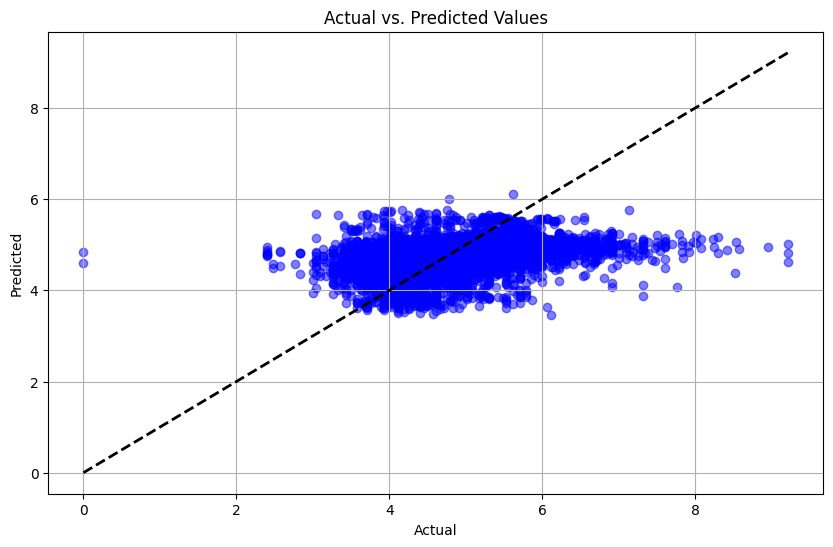

In [75]:
import matplotlib.pyplot as plt

# Actual vs Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, LR_pred, alpha=0.5, color='blue')  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

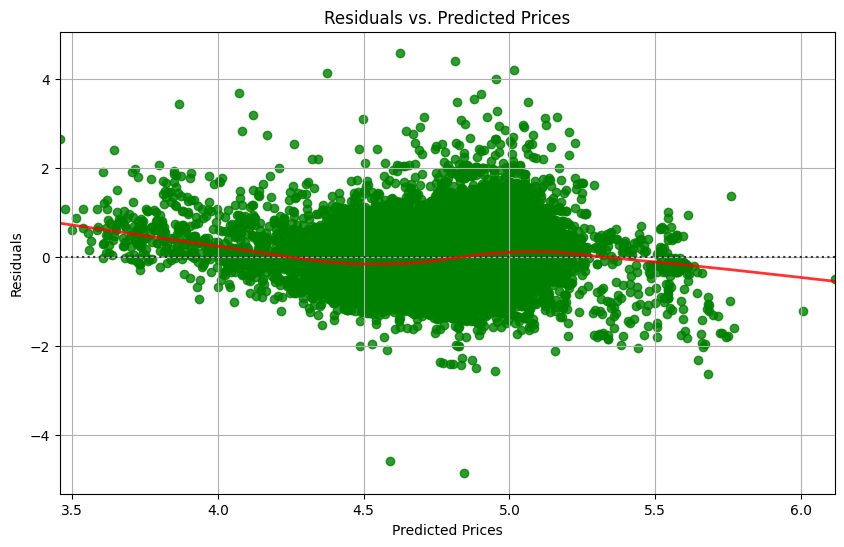

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - LR_pred

# Create the residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x=LR_pred, y=residuals, lowess=True, color="g",
              line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.grid(True)
plt.show()

## 2.1 Lasso

In [77]:
# Define the parameter grid including alpha
params = {'alpha': [0.01, 0.1, 1.0, 10.0],
          'fit_intercept': [True, False], 'copy_X':[True, False], 'positive':[True, False]}

In [78]:
# Initialize Lasso regression model
lasso_model = Lasso(max_iter=10000)

# Building Grid Search algorithm with cross-validation and Mean Squared Error score
grid_search_lasso = GridSearchCV(estimator=lasso_model,
                                 param_grid=params,
                                 cv=5,
                                 return_train_score=True)
grid_search_lasso.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             return_train_score=True)

In [79]:
# Get the best parameters and best score
best_parameters_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print(best_parameters_lasso)


{'alpha': 0.1, 'copy_X': True, 'fit_intercept': False, 'positive': False}


## 3. Decision Tree

In [80]:
model_DT = DecisionTreeRegressor()
params = {'max_depth': range(2, 11), 'min_samples_leaf': range(2,11)}
## Building Grid Search algorithm with cross-validation and Mean Squared Error score.
grid_search_DT = GridSearchCV(estimator=model_DT,
                              param_grid=params,
                              cv=5,
                              return_train_score=True)
grid_search_DT.fit(X_train, y_train)
best_parameters_DT = grid_search_DT.best_params_
best_score_DT = grid_search_DT.best_score_
print(best_parameters_DT)


{'max_depth': 9, 'min_samples_leaf': 10}


In [81]:
best_DT = DecisionTreeRegressor(**best_parameters_DT)
best_DT.fit(X_train, y_train)
DT_pred = best_DT.predict(X_test)

In [97]:
print('MAE: %f'% mean_absolute_error(y_test, DT_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, DT_pred)))
print('R2: %f' % r2_score(y_test, DT_pred))

MAE: 0.387564
RMSE: 0.415876
R2: 0.754632


## 4. Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [84]:



param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
rf_regressor = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_parameters_RF = random_search.best_params_
best_score_RF = random_search.best_score_

In [87]:
print("Best Parameters for Random Forest:", best_parameters_RF)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}


In [88]:
rf_regressor = RandomForestRegressor(n_estimators= 300, min_samples_split= 10, min_samples_leaf= 2, max_depth= 20, bootstrap= True)

In [89]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [90]:
y_pred = rf_regressor.predict(X_test)

In [91]:
mse = mean_squared_error(y_test, y_pred)

In [92]:
mae = mean_absolute_error(y_test, y_pred)

In [93]:
r2 = r2_score(y_test, y_pred)

In [94]:
import math

In [96]:
print("Root Mean Squared Error:", math.sqrt(mse))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 0.362689
R2 Score: 0.805694
Mean Absolute Error: 0.145645
